In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def my_convolve2d(image, temp):
    """
    Perform a 2D convolution between an image and a template.
    Implements convolution with zero padding.

    Parameters:
    image: 2D numpy array representing the grayscale image.
    temp : 2D numpy array representing the template (kernel).

    Returns:
    2D numpy array representing the convolved image.
    """

    # Flip the template (convolution operation)
    temp = np.flipud(np.fliplr(temp))

    # Get image and template dimensions
    iH, iW = image.shape
    kH, kW = temp.shape

    # Calculate padding size (assuming odd kernel size)
    pad_h = kH // 2
    pad_w = kW // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0)

    # Initialize the output image
    output = np.zeros((iH, iW), dtype=np.float64)

    # Perform convolution
    for i in range(iH):
        for j in range(iW):
            # Extract the region of the padded image
            region = padded_image[i:i+kH, j:j+kW]

            # Compute the convolution sum
            output[i, j] = np.sum(region * temp)

    # Return after all iterations are complete ✅
    return output


In [3]:
def hough_circle(canvas, r, vote_threshold_ratio, theta_step):
  H, W = canvas.shape
  accum = np.zeros((H, W), dtype=np.float32) # Accumulator for circle center
  theta = np.deg2rad(np.arange(0, 360, theta_step))

  # Iterate over every pixel (y, x)in the edge-detected image
  for y in range(H):
    for x in range(W):
      if canvas[y, x] > 0:#only consider edge points
        for t in theta:
          a = int(x - r*np.cos(t))
          b = int(y - r*np.sin(t))
          if 0<= a <W and 0<= b <H:
            accum[b, a] += 1

  # Find the maximum value in the Accumulator to dynamically set a threshold
  max_votes = np.max(accum)
  vote_threshold = vote_threshold_ratio * max_votes

  #Threshold accumulator to find strong candidates for cirlce center
  centers = np.argwhere(accum >= vote_threshold)

  return centers, accum


In [4]:
def imshow(image, title=None):
    if image is None:
        raise ValueError("Error: The image is None. Please check the input image.")
    # Convert image to uint8 if necessary
    if image.dtype != np.uint8:
        image = np.clip(image, 0, 255).astype(np.uint8)
    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()


In [5]:
# Load and preprocess the circle image
circle_image_path = os.path.join("/content/circles.png")

In [6]:
# Load the image, check for loading errors
circle_image = cv2.imread(circle_image_path, cv2.IMREAD_GRAYSCALE)


In [7]:
# Apply Canny edge detection, check for valid output
edges = cv2.Canny(circle_image, 100, 200)

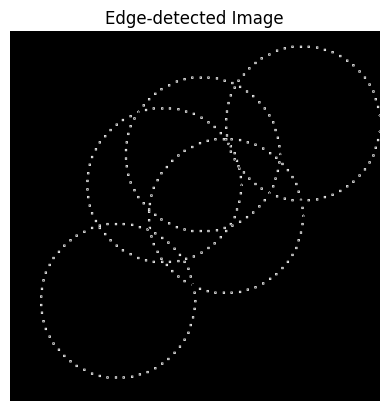

In [8]:
# Display the edge-detected image
imshow(edges, "Edge-detected Image")

In [9]:
# Parameters for Hough Circle detection
r = 100  # Known radius of circles
vote_threshold_ratio = 0.5  # Ratio of maximum votes needed to consider a circle center
theta_step = 1  # Smaller step size for better precision

# Detect circle centers using Hough Transform
centers, accumulator = hough_circle(edges, r, vote_threshold_ratio, theta_step)

# Display detected centers on the original image
print(f'Circle centers found: {centers}')


Circle centers found: [[117 379]
 [117 380]
 [118 377]
 [118 378]
 [118 379]
 [118 380]
 [118 381]
 [119 377]
 [119 378]
 [119 379]
 [119 380]
 [119 381]
 [120 377]
 [120 378]
 [120 379]
 [120 380]
 [121 379]
 [157 249]
 [158 247]
 [158 248]
 [158 249]
 [158 250]
 [159 247]
 [159 248]
 [159 249]
 [159 250]
 [159 251]
 [160 247]
 [160 248]
 [160 249]
 [160 250]
 [161 249]
 [161 250]
 [197 199]
 [198 197]
 [198 198]
 [198 199]
 [198 200]
 [199 197]
 [199 198]
 [199 199]
 [199 200]
 [199 201]
 [200 197]
 [200 198]
 [200 199]
 [200 200]
 [200 201]
 [201 199]
 [201 200]
 [237 279]
 [237 280]
 [238 277]
 [238 278]
 [238 279]
 [238 280]
 [239 277]
 [239 278]
 [239 279]
 [239 280]
 [239 281]
 [240 277]
 [240 278]
 [240 279]
 [240 280]
 [240 281]
 [241 279]
 [241 280]
 [347 139]
 [347 140]
 [348 137]
 [348 138]
 [348 139]
 [348 140]
 [349 137]
 [349 138]
 [349 139]
 [349 140]
 [349 141]
 [350 137]
 [350 138]
 [350 139]
 [350 140]
 [351 139]
 [351 140]]


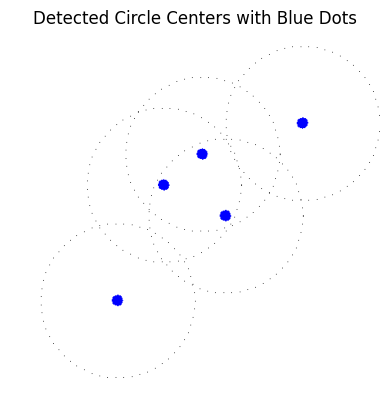

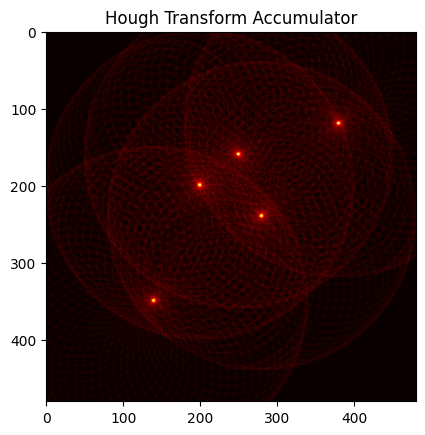

In [10]:
# Plot detected centers on the original image
output_image = cv2.cvtColor(circle_image, cv2.COLOR_GRAY2BGR)  # Convert to color for red dots
for center in centers:
    cv2.circle(output_image, (center[1], center[0]), 5, (0, 0, 255), -1)  # Red dot for each center

imshow(output_image, "Detected Circle Centers with Blue Dots")

# Optionally, you can visualize the accumulator array
plt.imshow(accumulator, cmap='hot')
plt.title('Hough Transform Accumulator')
plt.show()
